In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
import pickle
from statistics import mean

In [37]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer, MWETokenizer
from nltk.util import ngrams
import re
import string
from nltk.corpus import stopwords
from nltk.chunk import ne_chunk
set(stopwords.words('english'))
from nltk.tag import pos_tag
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.lancaster import LancasterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

In [38]:
got = pickle.load(open( "./Data/got_reddit_cleaned_monday.pkl", "rb" ) )
asoiaf = pickle.load(open( "./Data/soiaf_reddit_cleaned_monday.pkl", "rb" ) )
freefolk = pickle.load(open( "./Data/freefolk_reddit_cleaned_monday.pkl", "rb" ) )

In [42]:
print(got.shape)
print(asoiaf.shape)
print(freefolk.shape)

(153179, 6)
(28280, 6)
(175822, 6)


In [43]:
got = got.loc[got['sentiment_sum'] != 0]
asoiaf = asoiaf.loc[asoiaf['sentiment_sum'] != 0]
freefolk = freefolk.loc[freefolk['sentiment_sum'] != 0]

In [44]:
print(got.shape)
print(asoiaf.shape)
print(freefolk.shape)

(99718, 6)
(21041, 6)
(112709, 6)


In [47]:
#got['publish_date'] = ''
#asoiaf['publish_date'] = ''
#freefolk['publish_date'] = ''

In [48]:
def getting_date(df):
    for i, j in df.iterrows(): 
        df['publish_date'][i] = df['Publish Date'][i][:10]

In [49]:
getting_date(got)

In [16]:
getting_date(asoiaf)
getting_date(freefolk)

In [17]:
asoiaf['Publish Date'] = pd.to_datetime(asoiaf['Publish Date'])
got['Publish Date'] = pd.to_datetime(got['Publish Date'])
freefolk['Publish Date'] = pd.to_datetime(freefolk['Publish Date'])

asoiaf['publish_date'] = pd.to_datetime(asoiaf['publish_date'])
got['publish_date'] = pd.to_datetime(got['publish_date'])
freefolk['publish_date'] = pd.to_datetime(freefolk['publish_date'])

In [18]:
asoiaf['sentiment_sum'] = pd.to_numeric(asoiaf['sentiment_sum'])
got['sentiment_sum'] = pd.to_numeric(got['sentiment_sum'])
freefolk['sentiment_sum'] = pd.to_numeric(freefolk['sentiment_sum'])

In [19]:
#asoiaf.to_csv('asoiaf_monday.csv', index = False)
#got.to_csv('got_monday.csv', index = False)
#freefolk.to_csv('freefolk_monday.csv', index = False)

In [29]:
asoiaf = pd.read_csv('asoiaf_monday.csv')
got = pd.read_csv('got_monday.csv')
freefolk = pd.read_csv('freefolk_monday.csv')

In [54]:
def sentiment_mean_func(df):
    for i, j in df.iterrows(): 
        df['sentiment_mean'][i] = mean(list(df['sentiment_compound'][i]))

In [59]:
sentiment_mean_func(got)

In [60]:
sentiment_mean_func(freefolk)

In [61]:
sentiment_mean_func(asoiaf)

In [31]:
mean_sentiment_a = asoiaf.groupby(by = 'publish_date').mean()
mean_sentiment_g = got.groupby(by = 'publish_date').mean()
mean_sentiment_f = freefolk.groupby(by = 'publish_date').mean()

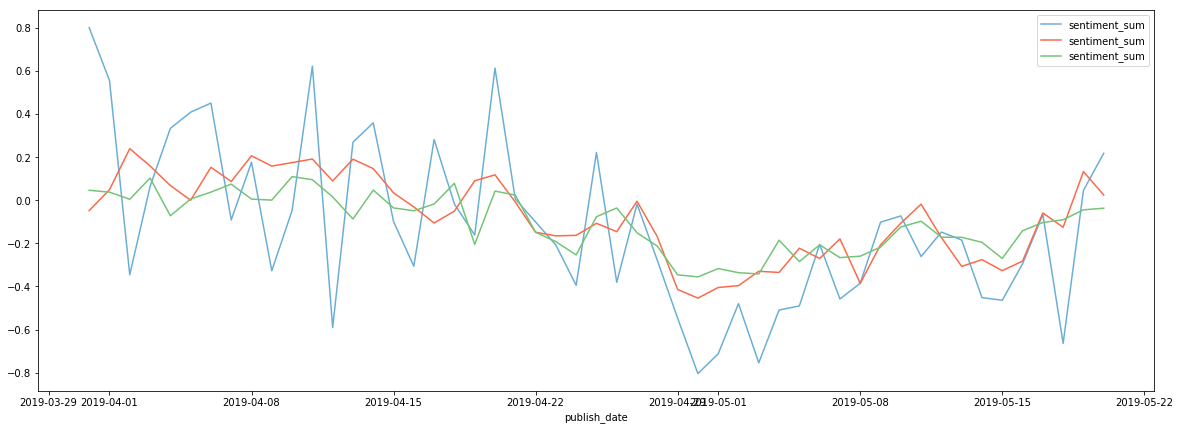

In [22]:
plt.figure(figsize=(20,7))
sns.lineplot(data = mean_sentiment_a, palette = 'Blues')
sns.lineplot(data = mean_sentiment_g, palette = 'Reds')
sns.lineplot(data = mean_sentiment_f, palette = 'Greens')

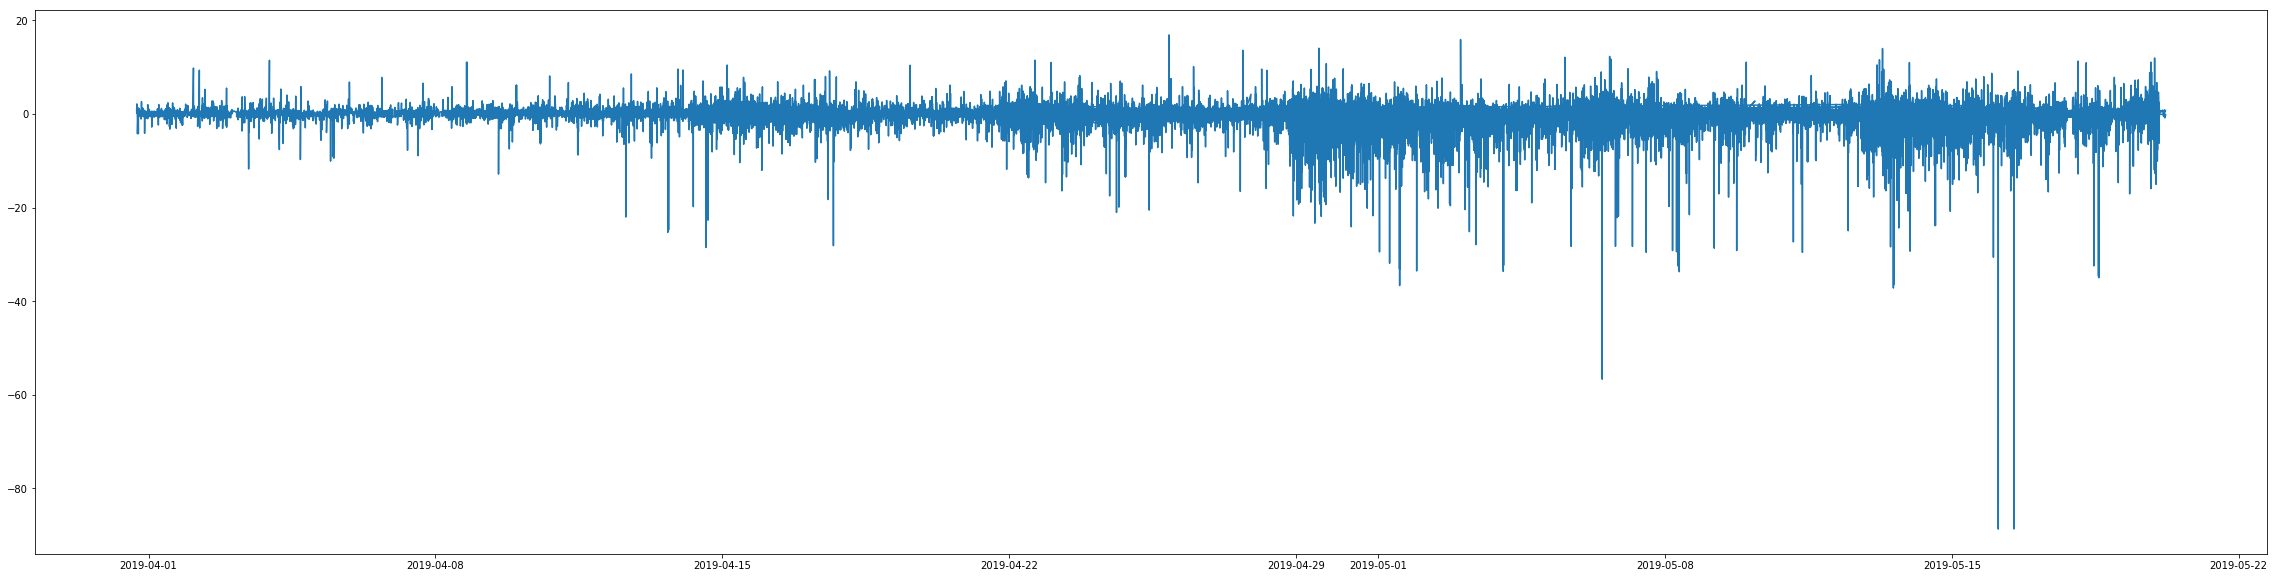

In [23]:
plt.figure(figsize=(40,10))
plt.plot(got['Publish Date'], got['sentiment_sum'])

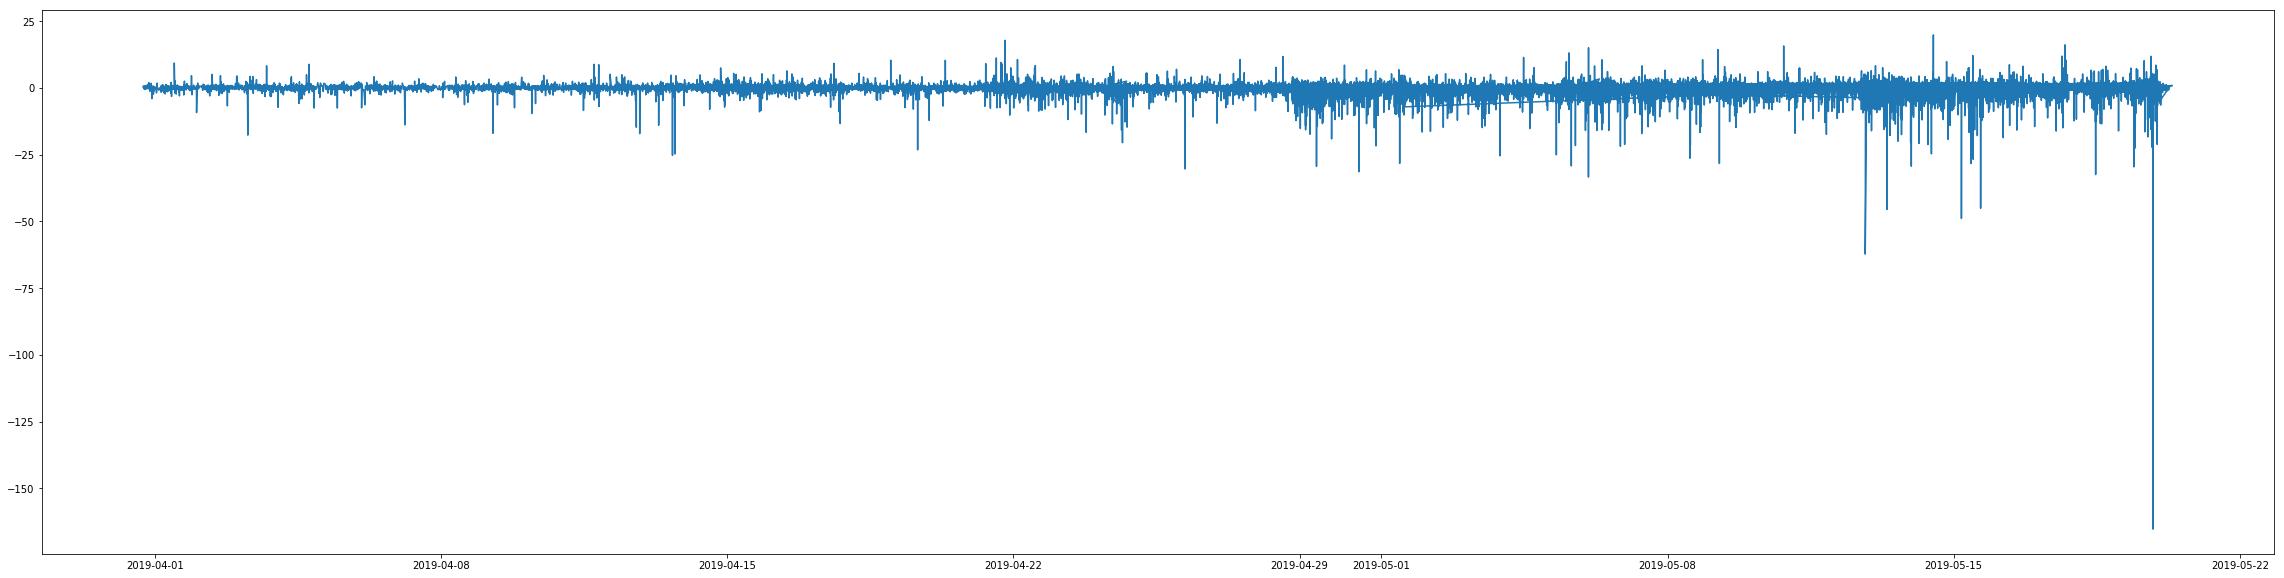

In [24]:
plt.figure(figsize=(40,10))
plt.plot(freefolk['Publish Date'], freefolk['sentiment_sum'])

In [64]:
#asoiaf.to_csv('asoiaf_monday.csv', index = False)
#got.to_csv('got_monday.csv', index = False)
#freefolk.to_csv('freefolk_monday.csv', index = False)